In [24]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

### Data input and cleaning

In [25]:
import re
sns.set()
data800 = pd.read_csv("data800M.csv", dtype={'time':np.float64})

data40 = pd.read_csv("data800.csv", dtype={'time':np.float64})

data = pd.concat([data40, data800], ignore_index=True)

data['error'] = [float(x[1:-1]) for x in data['fbest']]

def sanitize(data):
    return ''.join(filter(lambda x: x in ',.0123456789', data))

data['history'] = data['fhistory'].apply(sanitize)
data['ctime'] = data['currenttime'].apply(sanitize)

data['frac'] = data['sol'].str.count("1")/40

data = data.join(data['freq'].str.split(', ', expand=True).apply(pd.to_numeric))

data.drop(["fbest", "freq", "Unnamed: 0", "fhistory", "currenttime"], axis=1, inplace=True)
    
data.rename(columns=lambda x: x+1 if type(x)==int else x, inplace=True)
data['crossover'] = data['crossover'].str.replace("NotModalSixPoint", "TwoPoint")

data.head()

,crossover,errorLimit,f1,grad,nPop,sol,time,error,history,ctime,frac,1,2,3,4,5,6
0,TwoPoint,0.01,75,150,40,0101110110011100111111000011101110100111111101...,10887.748004,39.108015,"63.82350882,62.7576136,62.54418824,61.99511013...","359.17736387,434.45422626,550.78023672,640.317...",11.275,59.125858,250.926381,297.871987,460.124317,711.445383,977.971577
1,TwoPoint,0.01,75,150,40,1010101011101110101100001001111111101001000011...,10931.171752,33.526839,"61.2501784,60.2379804,58.09894529,57.61013485,...","383.88126087,488.88821197,646.82830358,712.315...",10.900,61.061843,235.364118,296.433163,476.769266,743.201440,919.792755
2,TwoPoint,0.01,75,150,40,1000111110111111100100111111001110001110111001...,10891.927374,38.818315,"65.83249043,63.65347688,62.83546505,62.8354650...","358.96347189,435.36109757,489.28408599,612.797...",10.750,58.134467,225.402005,289.884728,456.177687,727.023717,956.671612
3,TwoPoint,0.01,75,150,40,1101101100111110111001111010111111110000001111...,10880.964706,38.192483,"62.67500173,62.67500173,59.73254796,59.7325479...","406.42915082,559.69984365,656.17316484,747.060...",10.925,57.911495,236.185828,296.247593,464.484424,739.432221,955.391362
4,TwoPoint,0.01,75,150,40,1111001011111110110000100011111111111001110001...,10879.945712,36.454988,"64.9284745,63.5465312,61.10646924,60.94865728,...","329.13199139,484.67694759,605.73606658,714.894...",10.800,59.549136,235.600874,294.613512,482.873763,750.783818,950.769970


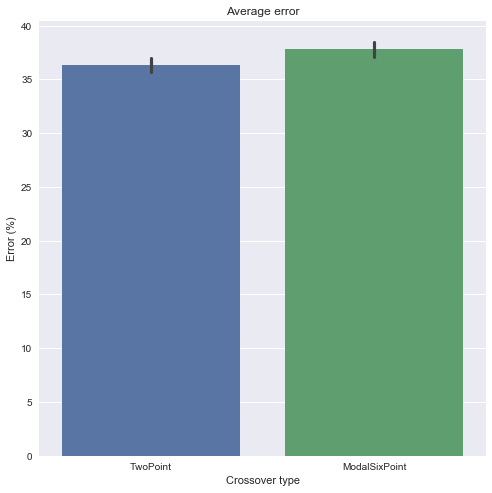

In [33]:
fig = plt.figure(figsize=(8, 8))

sns.barplot(x="crossover", y="error", data=data)
plt.title("Average error")
plt.xlabel("Crossover type")
plt.ylabel("Error (%)")
plt.show()

In [27]:
from scipy.stats import ttest_ind
(stat, pv) = ttest_ind(data.loc[data.crossover == "ModalSixPoint"].error, data.loc[data.crossover == "TwoPoint"].error, equal_var=False)
print("p-value = {:.4}".format(pv))

p-value = 0.007374


In [28]:
history = data.drop(['errorLimit', 'sol', 'time', 'frac', "f1", "grad", "error"], axis=1)
history.drop([x for x in history.columns if type(x)==int], axis=1, inplace=True)
history = pd.concat([history, history['history'].str.split(',', expand=True).apply(pd.to_numeric)], axis=1)
history.drop(["history"], axis=1, inplace=True)

history["ctime"] = history['ctime'].str.split(',', expand=False).apply(pd.to_numeric)

history.head()

,crossover,nPop,ctime,0,1,2,3,4,5,6,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
0,TwoPoint,40,"[359.17736387, 434.45422626, 550.78023672, 640...",63.823509,62.757614,62.544188,61.995110,60.269181,59.252822,59.252822,...,39.108015,39.108015,39.108015,39.108015,39.108015,39.108015,39.108015,39.108015,39.108015,39.108015
1,TwoPoint,40,"[383.88126087, 488.88821197, 646.82830358, 712...",61.250178,60.237980,58.098945,57.610135,57.610135,56.349303,54.830618,...,33.526839,33.526839,33.526839,33.526839,33.526839,33.526839,33.526839,33.526839,33.526839,33.526839
2,TwoPoint,40,"[358.96347189, 435.36109757, 489.28408599, 612...",65.832490,63.653477,62.835465,62.835465,61.894850,61.211689,61.035502,...,38.818315,38.818315,38.818315,38.818315,38.818315,38.818315,38.818315,38.818315,38.818315,38.818315
3,TwoPoint,40,"[406.42915082, 559.69984365, 656.17316484, 747...",62.675002,62.675002,59.732548,59.732548,59.732548,59.732548,57.003281,...,38.192483,38.192483,38.192483,38.192483,38.192483,38.192483,38.192483,38.192483,38.192483,38.192483
4,TwoPoint,40,"[329.13199139, 484.67694759, 605.73606658, 714...",64.928474,63.546531,61.106469,60.948657,60.841235,59.327731,59.327731,...,36.454988,36.454988,36.454988,36.454988,36.454988,36.454988,36.454988,36.454988,36.454988,36.454988


In [29]:
tseries = [[],[]]
for index, row in history.iterrows():
    tseries[1].append(pd.Series([row[x] for x in history.columns if type(x)==int], index=row["ctime"]/60))
    tseries[0].append(row["crossover"])


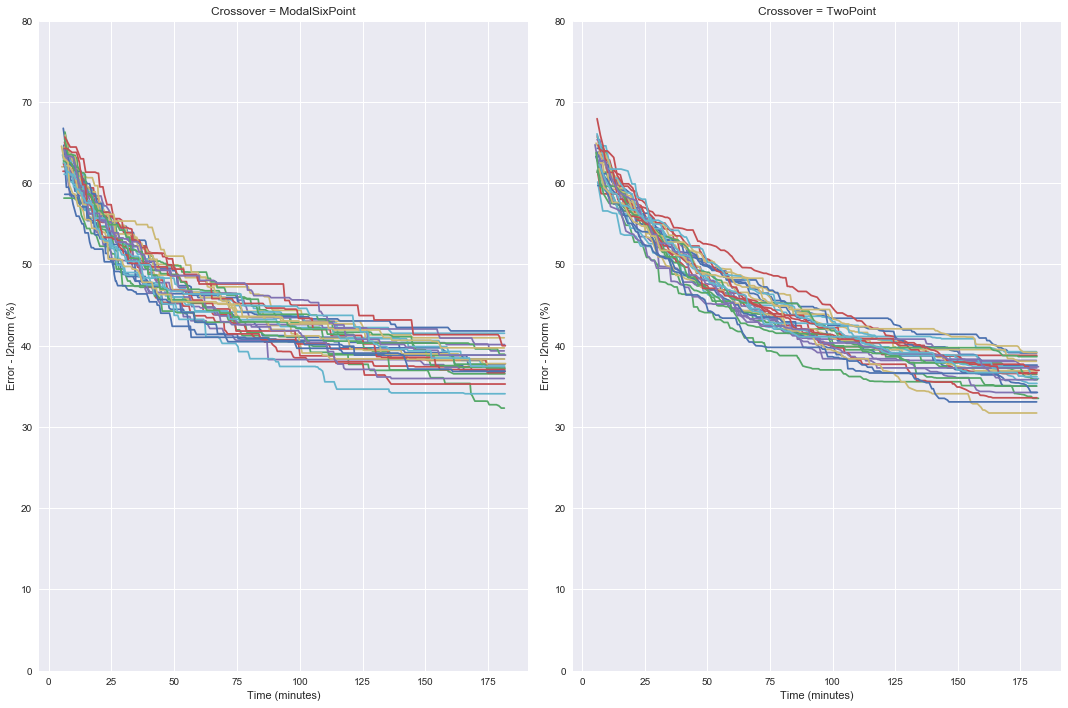

In [30]:
fig = plt.figure(figsize=(15, 10))

for index, i in enumerate(["ModalSixPoint", "TwoPoint"]):
    fig.add_subplot(1, 2, index+1)
    popseries = [tseries[1][x] for x in range(len(tseries[0])) if tseries[0][x] == i]
    for k in popseries:
        plt.plot(k)
    plt.title("Crossover = {}".format(i))
    plt.xlabel("Time (minutes)")
    plt.ylabel("Error - l2norm (%)")
    plt.ylim([0, 80])
    
plt.tight_layout()
plt.show()